In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molsysmt as msm
import numpy as np
from simtk import unit
import matplotlib.pyplot as plt

_ColormakerRegistry()

# RMSD, Least RMSD and Least RMSD fit

In [3]:
molecular_system = msm.convert('pentalanine.h5')

In [4]:
msm.info(molecular_system)

form,n atoms,n groups,n components,n chains,n molecules,n entities,n frames
molsysmt.MolSys,62,7,1,1,1,1,5000


In [5]:
time = msm.get(molecular_system, target='system', time=True)

## RMSD

The root mean squared deviation of a set of atom coordinates $\vec{R}:(\vec{r_{1}}, \vec{r_{2}}, ..., \vec{r_{n}})$, with respect to a reference set of atom coordinates $\vec{R'}:(\vec{r'_{1}}, \vec{r'_{2}}, ..., \vec{r'_{n}})$, is defined as:

\begin{equation}
\text{RMSD} (\vec{R'},\vec{R}) = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} \Vert \vec{r'_{i}} - \vec{r_{i}} \Vert ^{2}}
\end{equation}

\begin{equation}
\text{RMSD} (\vec{R'},\vec{R}) = 
\sqrt{ \frac{1}{n} \sum_{i=1}^{n} [(x'-x)^2 + (z'-z)^2 + (z'-z)^2]}
\end{equation}

These two sets of atom coordinates, with the same number of atoms, could belong to structures of two different molecular systems or could also be structures of the same system. Let see the case where the RMSD is calculated only with the backbone atoms of the structure of our molecular system at frame 100-th taking the frame 0-th as reference:

In [6]:
rmsd = msm.rmsd(molecular_system, selection='backbone', frame_indices=100, reference_frame_index=0)

There object returned is a numpy array with a single RMSD value:

In [7]:
print(rmsd)

[0.73817043] nm


Lets get now the RMSD of every single frame in the trajectory with the same structure as reference, the one found in frame 0-th:

In [8]:
rmsd = msm.rmsd(molecular_system, selection='backbone', frame_indices='all', reference_frame_index=0)

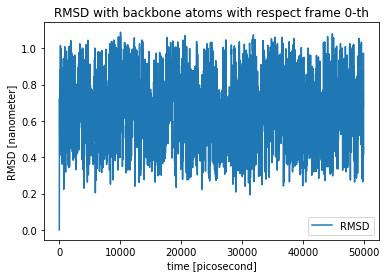

In [9]:
plt.plot(time, rmsd, label='RMSD')
plt.xlabel('time [{}]'.format(time.unit))
plt.ylabel('RMSD [{}]'.format(rmsd.unit))
plt.title('RMSD with backbone atoms with respect frame 0-th')
plt.legend()
plt.show()

In case of having two different molecular systems, `molsysmt.rmsd()` accepts all necessary input arguments to specify the set of atom coordinates to obtain the rmsd, for a single frame or a set of them: `item`, `selection` and `frame_indices` for the subject molecular system; and `reference_item`, `reference_selection`, and `reference_frame_index` for the reference molecular system.

Lets, for instance, create two different molecular systems (same topology in this case) to illustrate how these input arguments work:

In [23]:
molecular_system_1 = msm.extract(molecular_system, frame_indices=range(0,100))
molecular_system_2 = msm.extract(molecular_system, frame_indices=range(200,300))

In [25]:
rmsd = msm.rmsd(molecular_system_1, selection='backbone', frame_indices=80, 
                reference_item=molecular_system_2, reference_selection='backbone', reference_frame_index=20)

And we got the rmsd between to structures coming from two different frames from two molecular systems:

In [28]:
print(rmsd)

[0.94597531] nm


## Least RMSD

In [31]:
lrmsd = msm.least_rmsd(molecular_system, selection='backbone', frame_indices='all', reference_frame_index=0)
rmsd = msm.rmsd(molecular_system, selection='backbone', frame_indices='all', reference_frame_index=0)

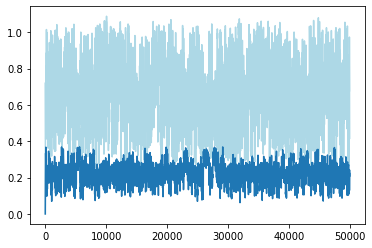

In [32]:
plt.plot(time, rmsd, color='lightblue')
plt.plot(time, lrmsd)
plt.show()

## Least RMSD fit


[Coutsias, Evangelos A., Chaok Seok, and Ken A. Dill. "Using quaternions to calculate RMSD." Journal of computational chemistry 25, no. 15 (2004): 1849-1857.](https://doi.org/10.1002/jcc.20110)


In [ ]:
fitted_molecular_system = msm.least_rmsd_fit(molecular_system, selection='backbone', frame_indices='all',
                                             reference_frame_index=0, to_form='molsysmt.MolSys')

In [ ]:
msm.info(fitted_molecular_system)

In [ ]:
fitted_rmsd = msm.rmsd(fitted_molecular_system, selection='backbone', frame_indices='all', reference_frame_index=0)

In [ ]:
plt.plot(time, rmsd, color='lightblue')
plt.plot(time, lrmsd, color='blue')
plt.plot(time, fitted_rmsd, color='red')
plt.show()